In [1]:
from pandas_datareader import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
stoxx = data.DataReader('^STOXX50E', 'yahoo', start = '2011-01-01', end = '2018-01-30')
ftse = data.DataReader('^FTSE','yahoo', start = '2011-01-01', end = '2018-01-30')

In [3]:
df_joined = pd.concat([stoxx, ftse],axis = 1, join = 'outer')
df_joined.columns = ['Stoxx_Open','Stoxx_High','Stoxx_Low','Stoxx_Close','Stoxx_Adj_Close','Stoxx_Volume',
                    'Ftse_Open','Ftse_High','Ftse_Low','Ftse_Close','Ftse_Adj_Close','Ftse_Volume']

In [4]:
idx = df_joined.copy()

In [5]:
idx.dropna(inplace=True)

In [6]:
idx = idx.drop(['Stoxx_Volume', 'Ftse_Volume'], axis = 1)

In [7]:
idx = idx.reset_index()

In [8]:
idx.head(2)

,Date,Stoxx_Open,Stoxx_High,Stoxx_Low,Stoxx_Close,Stoxx_Adj_Close,Ftse_Open,Ftse_High,Ftse_Low,Ftse_Close,Ftse_Adj_Close
0,2011-01-04,2844.169922,2844.169922,2844.169922,2844.169922,2844.169922,5899.899902,6049.500000,5899.899902,6013.899902,6013.899902
1,2011-01-05,2833.739990,2833.739990,2833.739990,2833.739990,2833.739990,6013.899902,6043.899902,5964.399902,6043.899902,6043.899902


In [9]:
idx_adj_close = idx.groupby(['Date','Stoxx_Adj_Close', 'Ftse_Adj_Close'], axis = 0).size()

In [10]:
df_idx_adj_close = pd.DataFrame(idx_adj_close)
df_idx_adj_close.to_excel('Indeces_Adj_Close_Ftse,Stoxx.xlsx')

In [11]:
ret = pd.read_excel('Indeces_Adj_Close_Ftse,Stoxx.xlsx')

#df_returned = df_returned.set_index('Date', inplace=True)

In [12]:
ret = ret.set_index('Date')

In [13]:
del ret[0]

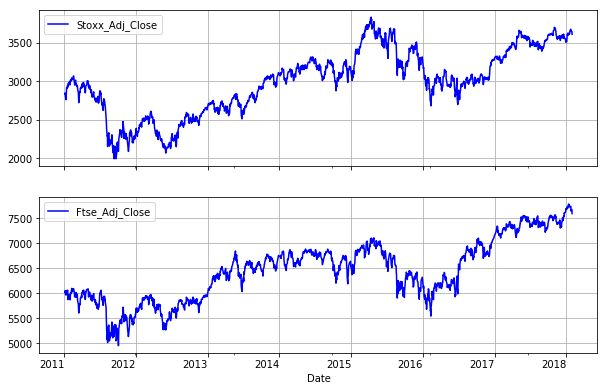

In [14]:
ret.plot(subplots=True, figsize = (10,7),
                color = 'blue', grid = True)
plt.xticks(rotation = 0)
plt.show()

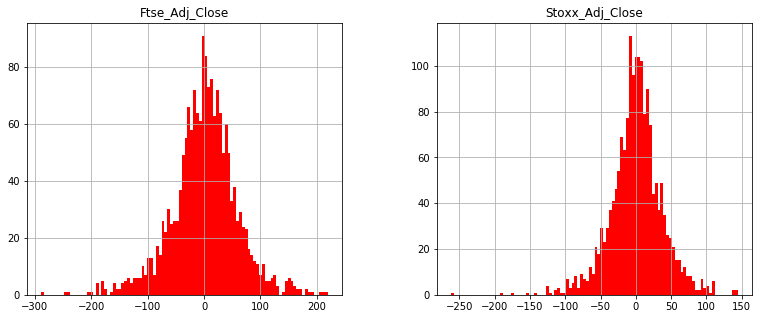

In [15]:
ret.diff().hist(figsize = (13,5), color = 'red', bins = 100);

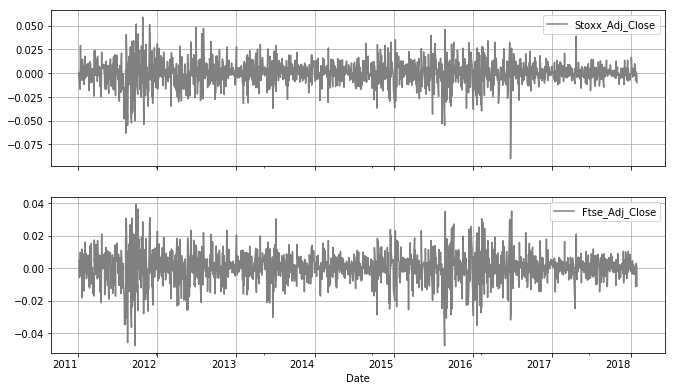

In [16]:
log_returns = np.log(ret / ret.shift(1)).dropna()
log_returns.plot(subplots = True, figsize = (11,7), color = 'grey', grid = True)
plt.xticks(rotation = 0);

### Correlation between STOXX and FTSE

In [17]:
log_returns.corr()

,Stoxx_Adj_Close,Ftse_Adj_Close
Stoxx_Adj_Close,1.000000,0.848265
Ftse_Adj_Close,0.848265,1.000000


### Ordinary Least Squares Regression

In [18]:
import statsmodels.api as sm
from pylab import *

In [19]:
ols_fit = sm.OLS(log_returns['Stoxx_Adj_Close'].values, log_returns['Ftse_Adj_Close'].values).fit()

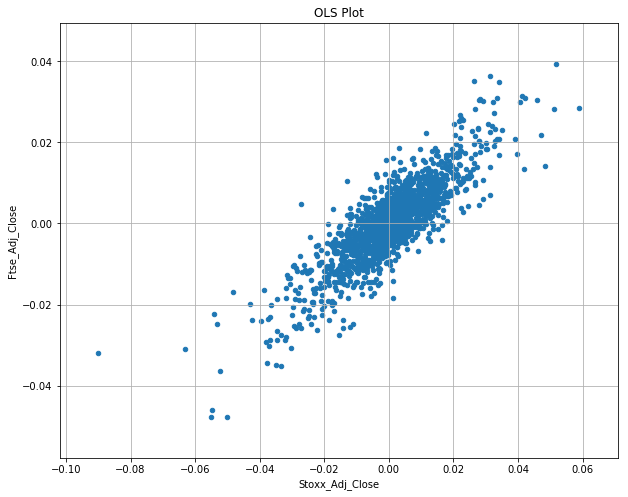

In [20]:
log_returns.plot(figsize=(10,8), x = 'Stoxx_Adj_Close',y = 'Ftse_Adj_Close', 
                 kind = 'scatter', grid = True, title = 'OLS Plot');

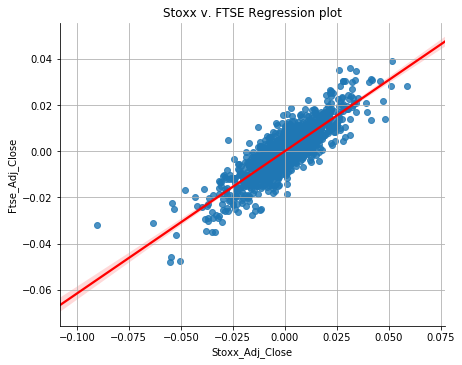

In [21]:
g = sns.lmplot('Stoxx_Adj_Close','Ftse_Adj_Close' ,data = log_returns,  line_kws={'color': 'red'})
plt.grid(True)
plt.title('Stoxx v. FTSE Regression plot')
g.fig.set_size_inches(7,5)

In [22]:
ols_fit = sm.OLS(log_returns['Stoxx_Adj_Close'].values, log_returns['Ftse_Adj_Close'].values).fit()

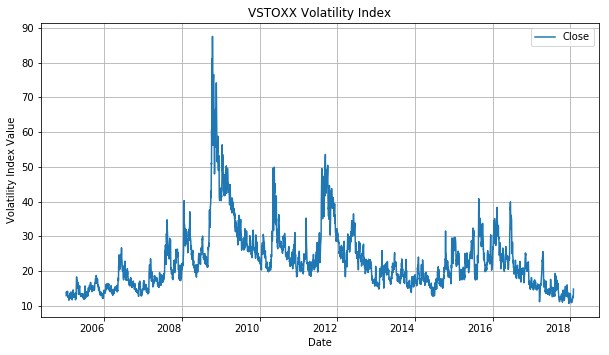

In [23]:
vstoxx = pd.read_excel('VstoxxIndex.xlsx', index_col=0)
vstoxx.plot(figsize = (10,6))
plt.grid(True)
plt.title('VSTOXX Volatility Index')
plt.ylabel('Volatility Index Value')
plt.xticks(rotation = 0);

In [24]:
VStoxx = pd.read_excel('Stoxx_Vstoxx_close_price.xlsx',index_col=0)

In [25]:
VStoxx_log_returns = np.log(VStoxx / VStoxx.shift(1)).dropna()

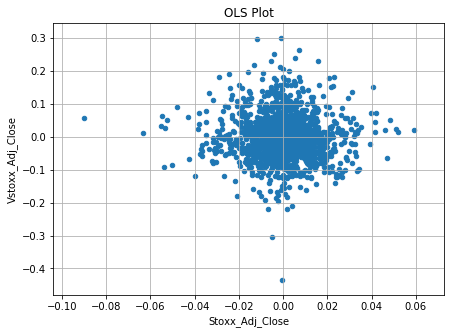

In [26]:
VStoxx_log_returns.plot(figsize=(7,5), x = 'Stoxx_Adj_Close',y = 'Vstoxx_Adj_Close', 
                 kind = 'scatter', grid = True, title = 'OLS Plot');

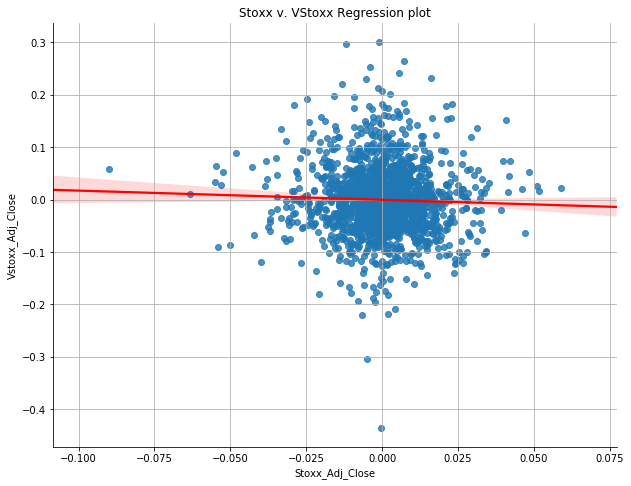

In [27]:
chart_ = sns.lmplot('Stoxx_Adj_Close','Vstoxx_Adj_Close' ,data = VStoxx_log_returns,  line_kws={'color': 'red'})
plt.grid(True)
plt.title('Stoxx v. VStoxx Regression plot')
chart_.fig.set_size_inches(10,7)